# Robust Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Outliers

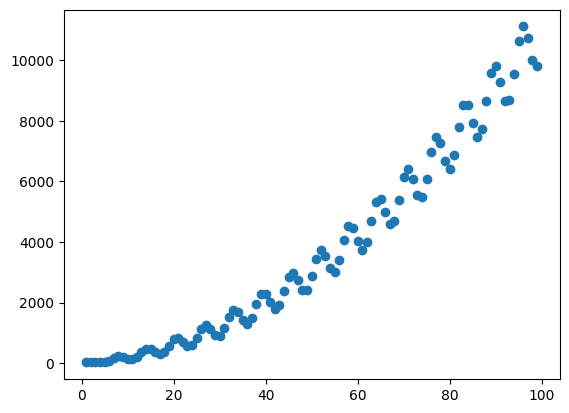

In [23]:
# Let's use the same data from earlier this morning and add some error
n = 100
x = np.arange(1,n).reshape(-1,1)
y = np.array([(i**2)+(10*i)*(np.sin(i)+1) for i in x])
plt.scatter(x,y)

In [24]:
# Add some problem data points
noutlier = 20

By making the number of outliers a variable it is easy to adjust and rerun to see how the number of outliers changes the ability to fit a model 

In [25]:
x = np.vstack([x,np.random.uniform(0,100,noutlier).reshape(noutlier,1)])
y = np.vstack([y,np.random.uniform(0, 8000,noutlier).reshape(noutlier,1)])
# Another option
# x = np.concatenate([x, np.random.uniform(0, 100, noutlier).reshape(-1,1)], axis=0)
# y = np.concatenate([y, np.random.uniform(0, 8000, noutlier).reshape(-1,1)], axis=0)

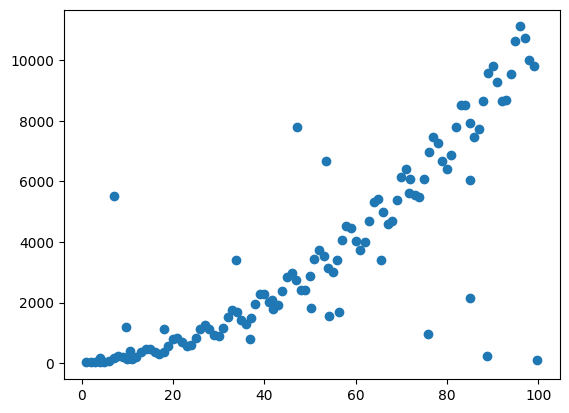

In [26]:
plt.scatter(x,y)

## Regression Model

Be sure to apply the transformation that we found earlier and separate out test and training sets

In [27]:
# Transform y variable
y = np.sqrt(y)

# Create train and test data sets: x_train, y_train, x_test, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

## 1) General regression model

In [28]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print("R^2: ",model.score(x_test, y_test))
print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

# Predict on test data
pred_test = model.predict(x_test)

# Residuals for test data
res_test = pred_test - y_test

# Predict on all data (ie. all x)
pred = model.predict(x)

# Residuals for all data
res = pred - y

R^2:  0.7126046557586336
Slope:  [[0.86329726]]
Intercept:  [9.20916678]


Plot two plots (1 row, two columns) to visualise the results for the test dataset. In the first plot, plot actual data and line fit for test data. In the second plot, plot the residuals for the test data. The functions ```sns.scatterplot()```, ```sns.lineplot()``` may be useful. 

You may need to reshape the data into the right format, e.g. ```x_test.reshape(-1)``` or ```x_test[:, np.newaxis]```

[Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Residuals (test data)')]

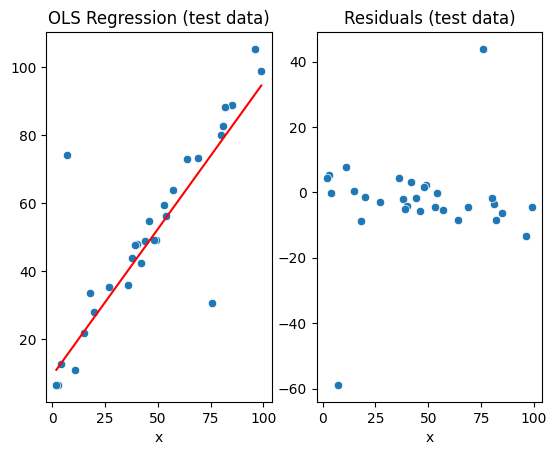

In [29]:
import seaborn as sns 
fig, ax = plt.subplots(1, 2)
sns.scatterplot(x=x_test.reshape(-1), y=y_test.reshape(-1), ax=ax[0]).set(xlabel='x', title='OLS Regression (test data)')
sns.lineplot(x=x_test.reshape(-1), y=pred_test.reshape(-1), ax=ax[0], color='red')

sns.scatterplot(x=x_test.reshape(-1), y=res_test.reshape(-1), ax=ax[1]).set(xlabel='x', title='Residuals (test data)')
 

Plot another two plots (1 row, two columns), this time to visualise the results for the entire dataset. Use ```x```, ```y``` this time instead of ```x_test``` and ```y_test```.

[Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Residuals (all data)')]

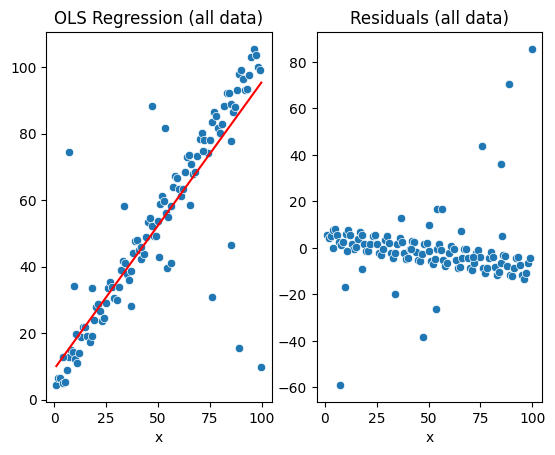

In [30]:
import seaborn as sns 
fig, ax = plt.subplots(1, 2)
sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1), ax=ax[0]).set(xlabel='x', title='OLS Regression (all data)')
sns.lineplot(x=x.reshape(-1), y=pred.reshape(-1), ax=ax[0], color='red')

sns.scatterplot(x=x.reshape(-1), y=res.reshape(-1), ax=ax[1]).set(xlabel='x', title = 'Residuals (all data)')
 

We want to repeat producing our plots for the next 3 sections. Instead of copying out the above code 3 times, write a function that will produce the visualisations you've just done above. Ideally, all variables used within the function should be defined in relation to the arguments of the function (but you can skip this in the interest of time).  

In [31]:

def make_plots(title=None):
    """
    Plot residual and model fit plots. The assumption of outside
    function variable names that this function is based on is bad practice.
    """
    ### YOUR CODE HERE ###
    fig, ax = plt.subplots(1, 2)
    sns.scatterplot(x=x_test.reshape(-1), y=y_test.reshape(-1), ax=ax[0]) 
    sns.lineplot(x=x_test.reshape(-1), y=pred_test.reshape(-1), ax=ax[0], color='red').set(xlabel='x', title= title + ' (test data)')
    sns.scatterplot(x=x_test.reshape(-1), y=res_test.reshape(-1), ax=ax[1]).set_title('residuals (test data)')   
 
    
    fig, ax = plt.subplots(1, 2)
    sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1), ax=ax[0])
    sns.lineplot(x=x.reshape(-1), y=pred.reshape(-1), ax=ax[0], color='red').set(xlabel='x', title=title + ' (all data)')
    sns.scatterplot(x=x.reshape(-1), y=res.reshape(-1), ax=ax[1]).set_title('residuals (all data)')   


In [32]:
# # Another Option with nice legends
# def make_plots(title=None):
#     """
#     Plot residual and model fit plots. The assumption of outside
#     function variable names that this function is based on is bad practice.
#     """
#     if(x.shape[1] > 1):
#         sort_axis = operator.itemgetter(0)
#         sorted_zip = sorted(zip(x_test[:,1],pred_test), key=sort_axis)
#         xplt, yplt = zip(*sorted_zip)
#     else:
#         xplt = x_test
#         yplt = pred_test
        
#     plt.subplot(121)
#     plt.scatter(xplt,y_test,label='Test data')
#     plt.plot(xplt,yplt,label=title,color='red',linewidth=2)
#     plt.legend()
#     plt.subplot(122)
#     plt.scatter(xplt,res_test)
#     plt.title("Residuals (test data)")
#     plt.show()

#     if(x.shape[1] > 1):
#         sort_axis = operator.itemgetter(0)
#         sorted_zip = sorted(zip(x[:,1],pred), key=sort_axis)
#         xplt, yplt = zip(*sorted_zip)
#     else:
#         xplt = x
#         yplt = pred

#     plt.subplot(121)
#     plt.plot(xplt,yplt,label=title,color='red',linewidth=2)
#     plt.scatter(xplt,y,label='Data')
#     plt.legend()
#     plt.subplot(122)
#     plt.scatter(xplt,res)
#     plt.title("Residuals")

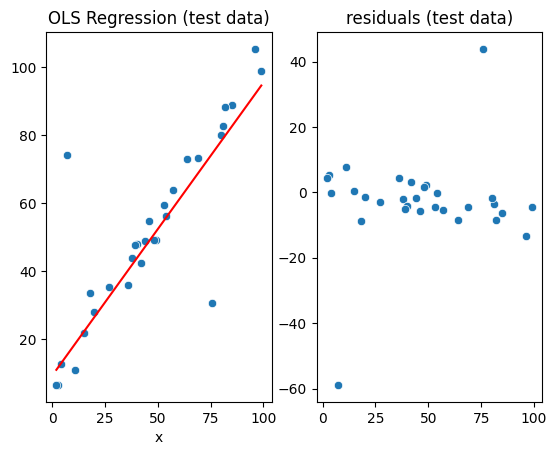

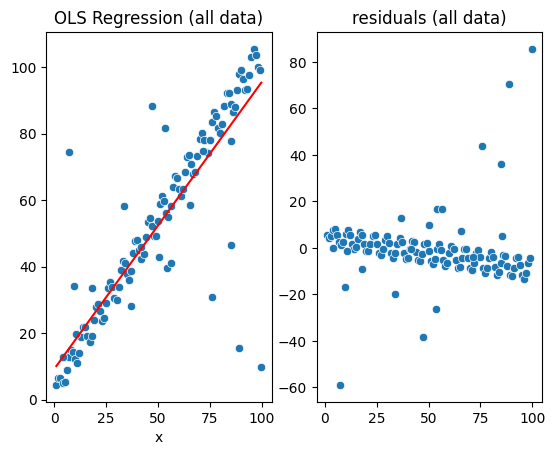

In [33]:
make_plots('OLS Regression')

## 2) RANSAC

RANSAC: Randomly sample the points over and over again, and pick the sample that best represents the inliers

In [34]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train)
print("R^2: ",ransac.score(x_test, y_test))
pred_test = ransac.predict(x_test)
res_test = pred_test - y_test
pred = ransac.predict(x)
res = pred - y

R^2:  0.6876211252431985


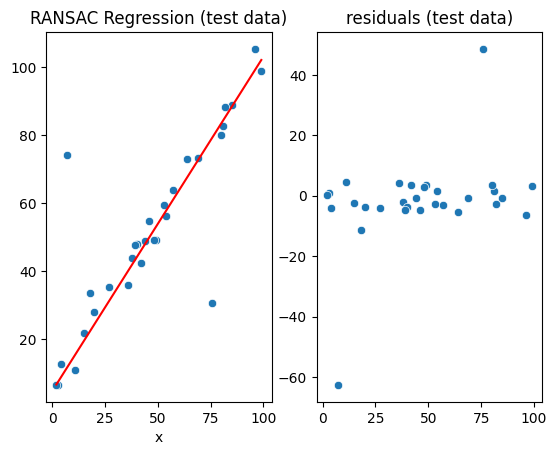

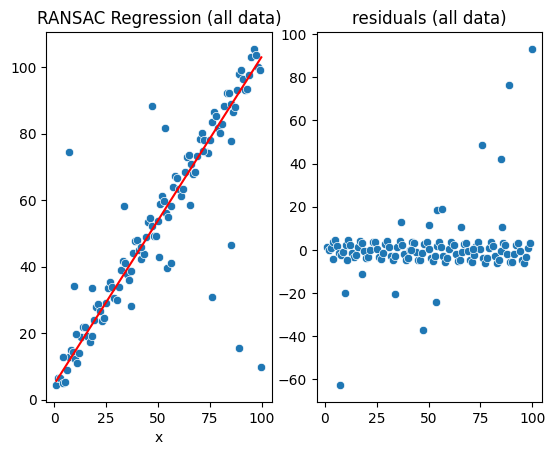

In [35]:
make_plots('RANSAC Regression')

## 3) Theil-Sen


Theil-Sen: Pick out all possible pairs of points, calculate all the slopes and pick the median. Calculate the intercept and choose the median


In [36]:
pred_test.shape, x_test.shape

((30, 1), (30, 1))

In [37]:
theil_sen = linear_model.TheilSenRegressor(random_state=3)
theil_sen.fit(x_train, y_train.ravel())
print("R^2: ",theil_sen.score(x_test, y_test))
pred_test = theil_sen.predict(x_test)[:, np.newaxis]
res_test = pred_test - y_test
pred = theil_sen.predict(x)[:, np.newaxis]
res = pred - y

R^2:  0.6880591544933884


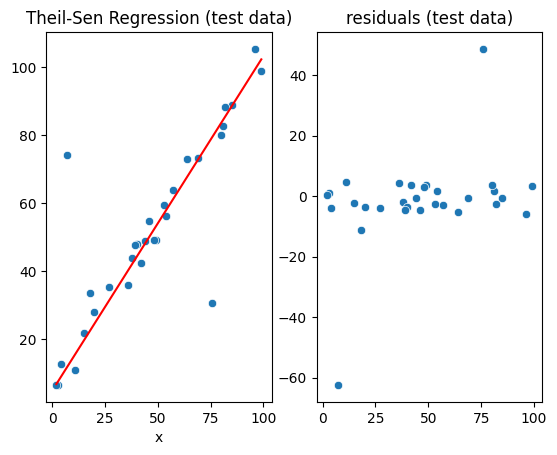

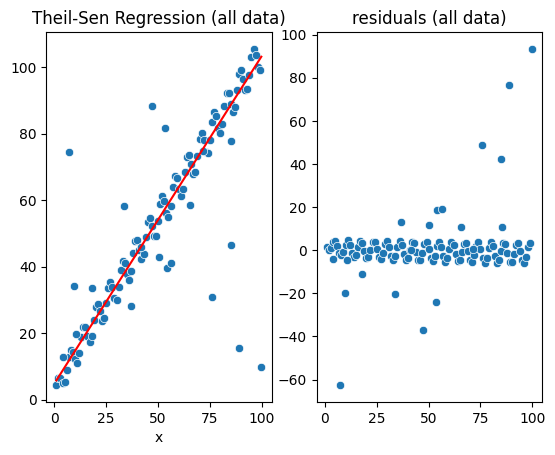

In [38]:
make_plots('Theil-Sen Regression')

## 4) Huber 

Huber Regression: Model fit that minimises Huber loss. Huber loss is a mix of squared loss and absolute loss

In [39]:
y_test.shape

(30, 1)

In [40]:
huber = linear_model.HuberRegressor()
huber.fit(x_train, y_train.ravel())
print("R^2: ",huber.score(x_test, y_test))
pred_test = huber.predict(x_test)[:, np.newaxis]
res_test = pred_test - y_test
pred = huber.predict(x)[:, np.newaxis]
res = pred - y

R^2:  0.6843677153069423


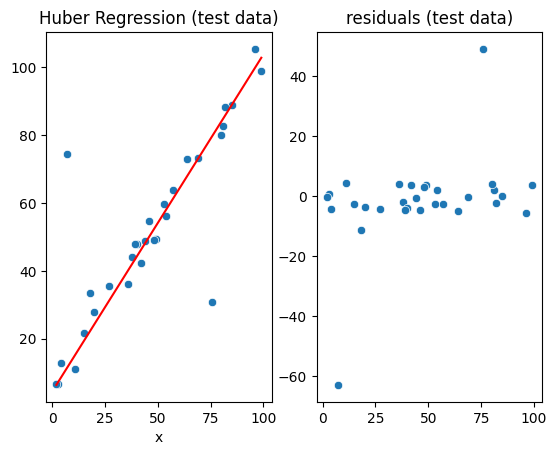

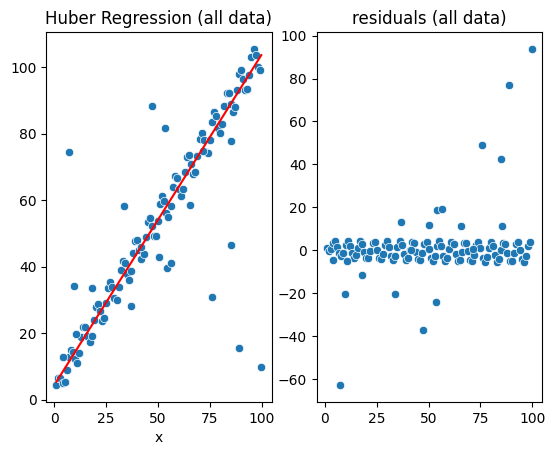

In [41]:
make_plots('Huber Regression')

### Comparison

In [42]:
print("R^2 OLS: ",model.score(x_test, y_test))
print("R^2 RANSAC: ",ransac.score(x_test, y_test))
print("R^2 Theil-Sen: ",theil_sen.score(x_test, y_test))
print("R^2 Huber: ",huber.score(x_test, y_test))

R^2 OLS:  0.7126046557586336
R^2 RANSAC:  0.6876211252431985
R^2 Theil-Sen:  0.6880591544933884
R^2 Huber:  0.6843677153069423


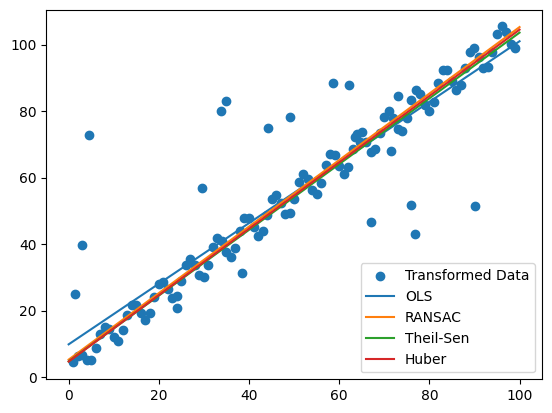

In [74]:
plt.scatter(x,y,label='Transformed Data')
xseq = np.linspace(0,100,num=100).reshape(-1, 1)
plt.plot(xseq,model.predict(xseq),label='OLS')
plt.plot(xseq,ransac.predict(xseq),label='RANSAC')
plt.plot(xseq,theil_sen.predict(xseq),label='Theil-Sen')
plt.plot(xseq,huber.predict(xseq),label='Huber')
plt.legend()

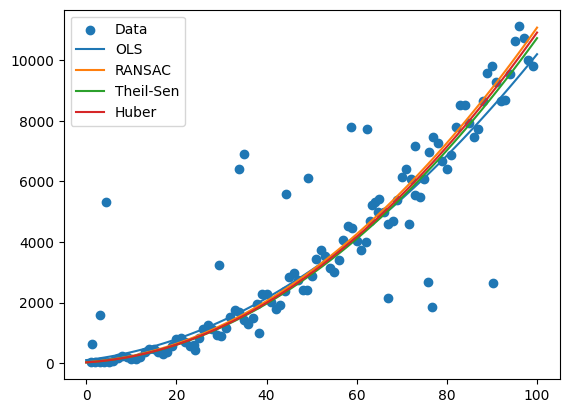

In [75]:
plt.scatter(x,y**2,label='Data')
xseq = np.linspace(0,100,num=100).reshape(-1, 1)
plt.plot(xseq,model.predict(xseq)**2,label='OLS')
plt.plot(xseq,ransac.predict(xseq)**2,label='RANSAC')
plt.plot(xseq,theil_sen.predict(xseq)**2,label='Theil-Sen')
plt.plot(xseq,huber.predict(xseq)**2,label='Huber')
plt.legend()